In [93]:
from sktime.datasets import load_japanese_vowels, load_arrow_head, load_basic_motions, load_osuleaf, load_italy_power_demand, load_gunpoint
from Mc2PCA import Mc2PCA
import matplotlib.pyplot as plt 

# dataset from this website : https://www.sktime.net/en/stable/api_reference/datasets.html

# X_train, y_train = load_arrow_head() # Bizarre comment il est construit ce dataset
# X_train, y_train = load_osulead() # Il est construit pareil
# X_train, y_train = load_italy_power_demand() # Il est construit pareil
# X_train, y_train = load_gunpoint() # Il est construit pareil


X_train.head()

,dim_0
0,0 -0.647885 1 -0.641992 2 -0.63818...
1,0 -0.644427 1 -0.645401 2 -0.64705...
2,0 -0.778353 1 -0.778279 2 -0.77715...
3,0 -0.750060 1 -0.748103 2 -0.74616...
4,0 -0.599539 1 -0.597422 2 -0.59926...


## Dataset Japanese vowel

In [82]:
import numpy as np
from sktime.datasets import load_japanese_vowels
from Mc2PCA import Mc2PCA
import matplotlib.pyplot as plt 

# X, y = load_japanese_vowels(return_X_y=True, split="test")
X_train, y_train = load_japanese_vowels(return_X_y=True)

# shuffle rows
# X_train = X.sample(frac=1)
# y_train = y[X_train.index]

 28%|██▊       | 14/50 [00:33<01:25,  2.38s/it]


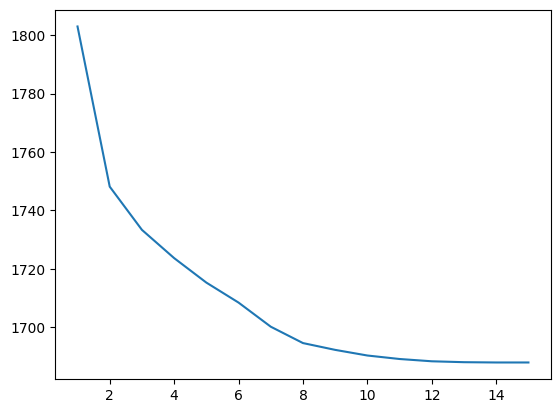

In [83]:
K = 9
p = 3
seuil = 1e-7
new_idx, E = Mc2PCA(X_train, K, p, seuil, max_iter= 50)
plt.plot(E)

In [85]:
classes = [np.where(y_train == str(i))[0] for i in range(1,np.max(y_train.astype(int))+1)]

In [86]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from scipy.stats import mode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, classes):
    # Aligner les étiquettes de cluster avec les vraies étiquettes
    labels = np.zeros_like(y_pred)
    for i in range(max(y_pred) + 1):
        mask = (y_pred == i)
        if np.sum(mask) > 0:
            # Trouver le mode en utilisant np.unique
            unique, counts = np.unique(y_true[mask], return_counts=True)
            labels[mask] = unique[np.argmax(counts)]

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, labels)
    # print(conf_matrix)

    # Calcul de la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred, labels=classes)

    # Affichage de la matrice de confusion
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=classes, yticklabels=classes)
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraie Classe')
    plt.xlabel('Classe Prédite')
    plt.show()

def compute_precision(C, G):
    """
    Compute the precision of clustering as described in the provided formula.
    
    C is a list of numpy arrays, where each array represents the indices of MTS objects in the jth predicted cluster.
    G is a list of sets, where each set contains the indices of MTS objects in the ith true group.
    
    Parameters:
    - C: A list of numpy arrays representing the predicted clusters.
    - G: A list of sets representing the true groups.
    
    Returns:
    - The precision of the clustering.
    """
    N = sum(len(c) for c in C)  # Total number of MTS objects
    precision = 0.0
    
    for cj in C:
        cj_set = set(cj)
        max_intersection = max(len(cj_set.intersection(gi)) for gi in G)
        precision += (len(cj) / N) * (max_intersection / len(cj))
        
    return precision


Adjusted Rand Index: 0.31756537713033267
varie entre -1 et 1, 1 indique une correspondance parfaite, 0 indique une correspondance aléatoire et -1 indique une correspondance complètement incorrecte
Precision: 0.5640625


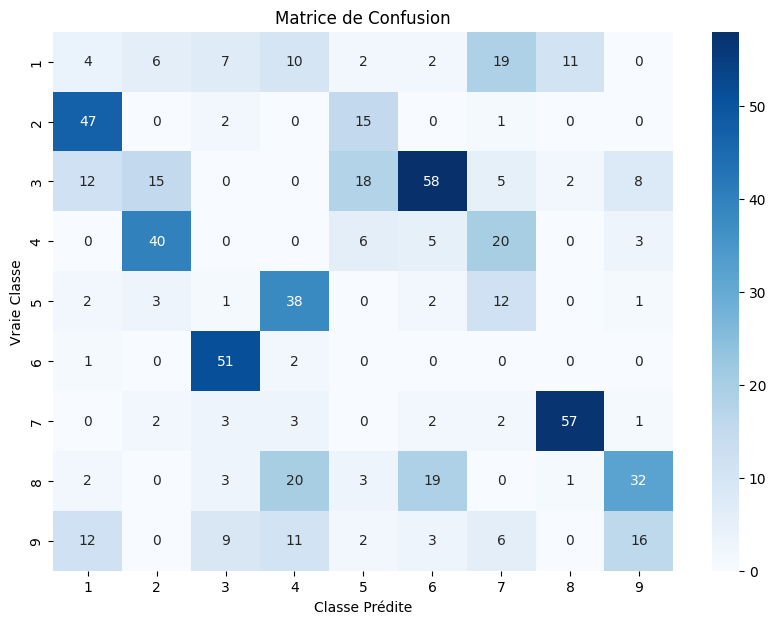

In [87]:
# Conversion des indices en classes
class_estimate = np.arange(len(y_train))
for i in range(len(new_idx)):
    class_estimate[new_idx[i]] = i + 1


# Calcul de l'ARI
ari_score = adjusted_rand_score(y_train.astype(int), class_estimate)

print("Adjusted Rand Index:", ari_score) 
print("varie entre -1 et 1, 1 indique une correspondance parfaite, 0 indique une correspondance aléatoire et -1 indique une correspondance complètement incorrecte")

# Calcul de la précision
precision = compute_precision(new_idx, classes)
print("Precision:", precision)

plot_confusion_matrix(y_train.astype(int), class_estimate, classes = np.arange(1, np.max(y_train.astype(int) + 1)))

## Dataset Basic Motion

In [88]:
from sktime.datasets import load_basic_motions
from Mc2PCA import Mc2PCA
import matplotlib.pyplot as plt 

X_train, y_train = load_basic_motions(return_X_y=True)

def bib_encoder(y):
    bib = {}
    cpt = 1
    for label in y:
        if label not in bib:
            bib[label] = cpt
            cpt += 1
    return bib

bib = bib_encoder(y_train)
y_train = np.array([bib[label] for label in y_train])

# shuffle rows
# X_train = X.sample(frac=1)
# y_train = y[X_train.index]

 12%|█▏        | 6/50 [00:01<00:08,  5.15it/s]


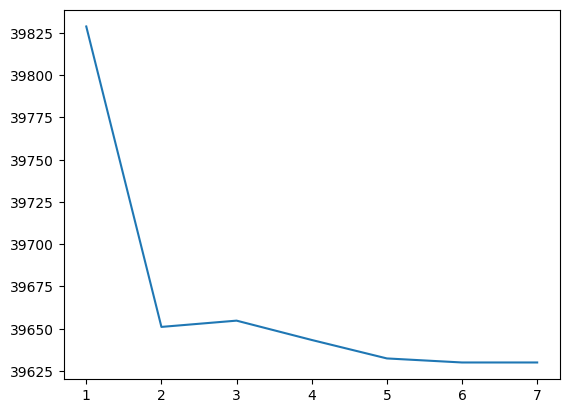

In [89]:
K = 9
p = 1
seuil = 1e-7
new_idx, E = Mc2PCA(X_train, K, p, seuil, max_iter= 50)
plt.plot(E)

Adjusted Rand Index: 0.4445138910590956
Precision: 0.7250000000000001


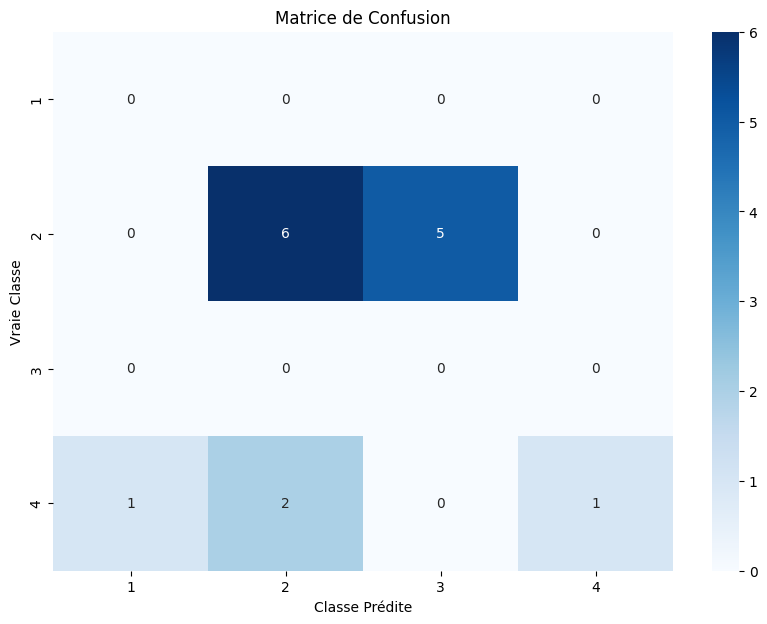

In [90]:
# Conversion des indices en classes
# True classes
classes = [np.where(y_train == i)[0] for i in range(1,np.max(y_train)+1)]
# Predicted classes
class_estimate = np.arange(len(y_train))
for i in range(len(new_idx)):
    class_estimate[new_idx[i]] = i + 1


# Calcul de l'ARI
ari_score = adjusted_rand_score(y_train.astype(int), class_estimate)

print("Adjusted Rand Index:", ari_score) 
# print("varie entre -1 et 1, 1 indique une correspondance parfaite, 0 indique une correspondance aléatoire et -1 indique une correspondance complètement incorrecte")

# Calcul de la précision
precision = compute_precision(new_idx, classes)
print("Precision:", precision)

plot_confusion_matrix(y_train.astype(int), class_estimate, classes = np.arange(1, np.max(y_train.astype(int) + 1)))

## Dataset Osuleaf

In [92]:
import numpy as np
from sktime.datasets import load_italy_power_demand
from Mc2PCA import Mc2PCA
import matplotlib.pyplot as plt 

X_train, y_train = load_italy_power_demand(return_X_y=True)

X_train.head()
# shuffle rows
# X_train = X.sample(frac=1)
# y_train = y[X_train.index]

,dim_0
0,0 -0.710518 1 -1.183320 2 -1.372442 3...
1,0 -0.993009 1 -1.426786 2 -1.579884 3...
2,0 1.319067 1 0.569774 2 0.195128 3...
3,0 -0.812444 1 -1.157553 2 -1.416385 3...
4,0 -0.972840 1 -1.390518 2 -1.536705 3...


## Synthetic Dataset

In [ ]:
import numpy as np
import pandas as pd

def create_synthetic_time_series(n, p, t, num_clusters):
    # Initialize an empty DataFrame
    X = pd.DataFrame(index=range(n), columns=range(p))

    # Populate the DataFrame with synthetic time series data
    for i in range(n):
        for j in range(p):
            # Example: Generate a sine wave with random frequency and phase
            freq, phase = np.random.uniform(0.5, 1.5), np.random.uniform(0, 2*np.pi)
            time_series_data = np.sin(np.linspace(0, 2*np.pi, t) * freq + phase)
            time_series = pd.Series(time_series_data)
            X.at[i, j] = time_series

    # Assign cluster labels
    y = np.random.choice(range(num_clusters), n)

    return X, y

# Define parameters
n = 100  # number of samples
p = 5    # number of features (time series dimensions)
t = 50   # length of each time series
num_clusters = 3  # number of clusters

# Create the synthetic dataset
# X, y = create_synthetic_time_series(n, p, t, num_clusters)


In [3]:
classes = [np.where(y == i)[0] for i in range(3)]

  0%|          | 0/100 [00:00<?, ?it/s]

  5%|▌         | 5/100 [00:00<00:05, 18.47it/s]


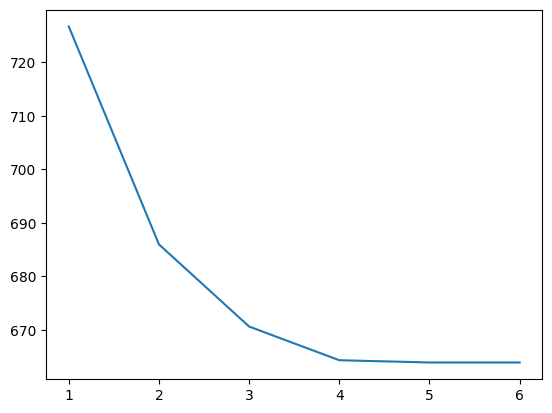

In [ ]:
K = 3
p = 2
seuil = 1e-14
new_idx, E = Mc2PCA(X, K, p, seuil, max_iter= 100)
plt.plot(E)

In [64]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

# Assuming X is your DataFrame of time series, each cell containing a pd.Series

# Step 1: Flatten the time series data
# Convert each time series into a single row
X_flattened = pd.DataFrame([X.iloc[i].apply(pd.Series).values.flatten() for i in range(X.shape[0])])

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_flattened)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Assuming you want 3 clusters
clusters = kmeans.fit_predict(X_pca)

/home/clement/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
clusters

array([1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1,
       2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0,
       0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0], dtype=int32)

In [71]:
sum(clusters == y)/len(y)

0.37

In [73]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# def perform_initial_clustering(X, n_clusters):
#     # Perform initial clustering (e.g., using K-Means)
#     # This is a simplified step. In practice, you might want to use more sophisticated methods.
#     kmeans = KMeans(n_clusters=n_clusters)
#     return kmeans.fit_predict(X)

def extract_features(series):
    """ Extract simple statistical features from a time series """
    return [np.mean(series), np.std(series), np.min(series), np.max(series)]

def perform_initial_clustering(X, n_clusters):
    # Create a new DataFrame for extracted features
    features = pd.DataFrame()

    # Iterate over each cell in the DataFrame and extract features
    for col in X.columns:
        features[col] = X[col].apply(extract_features)

    # Flatten the features DataFrame
    flattened_features = np.array(features.apply(pd.Series).values.tolist()).reshape(X.shape[0], -1)

    # Perform K-Means clustering on the flattened features
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(flattened_features)

def perform_cpca_and_assign_clusters(X, y_pred, n_clusters):
    cluster_pca_models = []
    new_y_pred = np.zeros_like(y_pred)

    for cluster_id in range(n_clusters):
        # Perform PCA on each cluster
        cluster_data = X[y_pred == cluster_id]
        pca = PCA()
        pca.fit(cluster_data)
        cluster_pca_models.append(pca)

    for i, series in enumerate(X):
        # Assign each series to the cluster whose PCA model gives the lowest reconstruction error
        errors = []
        for pca in cluster_pca_models:
            transformed = pca.transform(series)
            reconstructed = pca.inverse_transform(transformed)
            error = np.mean((series - reconstructed) ** 2)
            errors.append(error)
        new_y_pred[i] = np.argmin(errors)

    return new_y_pred

# Assuming 'X' is your dataset
n_clusters = 3  # Number of clusters
y_pred = perform_initial_clustering(X, n_clusters)

while True:
    new_y_pred = perform_cpca_and_assign_clusters(X, y_pred, n_clusters)
    if np.array_equal(new_y_pred, y_pred):
        break
    y_pred = new_y_pred

/home/clement/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: setting an array element with a sequence.